In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower

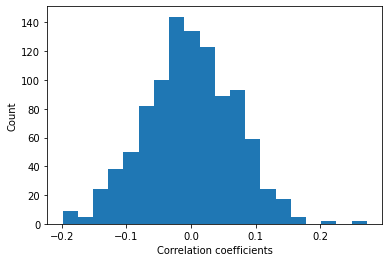

Effect size: 4.301435475483438
Sample size/Number needed in each group: 2.303
Effect size: 14.33811825161146


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/power.py:415: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [17]:
lc_activity = st.poisson.rvs(2, size=(200, 1000))
pd = np.random.normal(0, 1, (200, 1000))

correlations = np.zeros(1000)
for ii in np.arange(1000):
    correlations[ii], _ = st.spearmanr(lc_activity[:,ii], pd[:,ii])    

plt.hist(correlations, bins=20)
plt.xlabel('Correlation coefficients')
plt.ylabel('Count')
plt.show()

#power analysis
power_ = 0.8
alpha=0.05
es = 0.3 /np.std(correlations)
num_n = np.zeros(np.size(es))

obj = TTestIndPower()
n = obj.solve_power(effect_size=es, alpha=alpha, power=power_, 
                    ratio=1, alternative='two-sided')
print(f'Effect size: {es}')  
print('Sample size/Number needed in each group: {:.3f}'.format(n))


#power analysis
power_ = 0.8
alpha=0.05
es = 1 /np.std(correlations)
num_n = np.zeros(np.size(es))

obj = TTestIndPower()
n = obj.solve_power(effect_size=es, alpha=alpha, power=power_, 
                    ratio=1, alternative='two-sided')
print(f'Effect size: {es}')  
print('Sample size/Number needed in each group: {:.3f}'.format(n))